In [4]:
from altaipony.ffd import FFD

import numpy as np
import matplotlib.pyplot as plt
import pandas
import pathlib
from altaipony.ffd import FFD, generate_random_power_law_distribution
%matplotlib inline
for att in ['axes.labelsize', 'axes.titlesize', 'legend.fontsize',
            'legend.fontsize', 'xtick.labelsize', 'ytick.labelsize']:
    plt.rcParams[att] = 16

#### This notebook plots FFD for multiple stars at once and fits power law in the obtained distribution

In [6]:
all_flares = pandas.read_pickle("../data/all_flares.pkl")
all_flares =all_flares.query("`ed_ratio`.notna()&`recovery_probability`.notna()&`ed_corr`.notna()")
# all_flares= all_flares.query("``<4e31") # uncomment for the energy cut-off
print(f"Found flares in: {np.unique(all_flares['name'])}")

Found flares in: ['Kepler-114' 'Kepler-138' 'Kepler-231' 'Kepler-26' 'Kepler-28'
 'Kepler-32' 'Kepler-49' 'Kepler-52' 'Kepler-83' 'Kepler-94' 'TRAPPIST-1']


For all sample stars, in the cell below, we plot the distribution of whole populations of found flares in the sample’s stars in the cumulative form (FFD). Black dots represent no correction plot for ED vs. frequency, and red dots for the corrected ED ratio between injected and recovered flares, i.e., corrected ED and the frequency. Blue dots represent corrected ED and the corrected individual frequencies of each flare by recovery probability, and green dots are for distribution, which tales to account for multiple stars by averaging each portion of the FFD by the number of stars that contribute to it.

Setting ED with new values, size 522.
Setting frequency values with new values, size 522.
Setting frequency adjusted count values with new values, size 522.
Setting ED with new values, size 522.
Setting frequency values with new values, size 522.
Setting frequency adjusted count values with new values, size 522.
Setting ED with new values, size 522.
Setting frequency values with new values, size 522.
Setting frequency adjusted count values with new values, size 636.
Setting multiple_stars flag with True.
Setting ED with new values, size 522.
Setting frequency values with new values, size 522.
Setting frequency adjusted count values with new values, size 1713.
Setting multiple_stars flag with True.
Setting ED with new values, size 522.
Setting frequency values with new values, size 522.
Setting frequency adjusted count values with new values, size 1713.


Mean energy: 5.14462461728832e+32
1.8 0.20300538512482041


,name,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,...,ed_ratio_std,amplitude_ratio_std,duration_ratio_std,recovery_probability_std,ed_corr_err,amplitude_corr_err,duration_corr_err,luminosity quiscent,flare_erg,flare_erg_rec
0,Kepler-114,13082,13088,269511,269517,300.352769,300.356855,1.568014,0.107263,0.006298,...,0.281731,0.192559,1.959248,0.289410,0.599473,0.001644,0.001495,1.983211e+32,3.109703e+32,4.151819e+32
1,Kepler-114,34135,34138,337785,337789,346.853832,346.856556,1.204708,0.091191,0.007765,...,0.193209,0.165724,1.529528,0.312702,0.321678,0.001634,0.000852,1.983211e+32,2.389190e+32,3.166439e+32
2,Kepler-114,25169,25173,553045,553049,493.472708,493.475432,1.487609,0.090170,0.008163,...,0.520834,1.089943,1.771637,0.312301,0.936259,0.011684,0.000540,1.983211e+32,2.950243e+32,3.548479e+32
3,Kepler-114,9642,9646,579046,579050,511.183150,511.185874,0.736112,0.094066,0.003541,...,0.253358,0.195362,1.805584,0.301188,0.270016,0.000939,0.000890,1.983211e+32,1.459866e+32,1.981198e+32
4,Kepler-114,25067,25070,594507,594510,521.714311,521.716354,0.488306,0.081301,0.003097,...,0.253358,0.195362,1.805584,0.301188,0.186545,0.000821,0.000668,1.983211e+32,9.684141e+31,1.314244e+32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,TRAPPIST-1,102883,102903,4206048,4206068,2981.603115,2981.616736,184.902714,6.270906,0.256652,...,1.543492,0.585187,0.577902,0.423371,533.473825,0.179965,0.007128,1.269236e+29,2.346852e+31,4.386531e+31
526,TRAPPIST-1,103259,103263,4206444,4206448,2981.872814,2981.875539,65.486165,2.262699,0.667120,...,0.237785,0.438652,0.537554,0.492228,33.546621,0.390118,0.002522,1.269236e+29,8.311741e+30,1.786558e+31
528,TRAPPIST-1,105190,105192,4208381,4208383,2983.192029,2983.193391,12.429085,1.961924,0.121497,...,0.237785,0.438652,0.537554,0.492228,6.648614,0.071049,0.001261,1.269236e+29,1.577544e+30,3.390835e+30
529,TRAPPIST-1,105530,105533,4209099,4209102,2983.681031,2983.683074,20.274290,2.948392,0.141307,...,0.237785,0.438652,0.537554,0.492228,10.773559,0.082633,0.001891,1.269236e+29,2.573286e+30,5.531121e+30


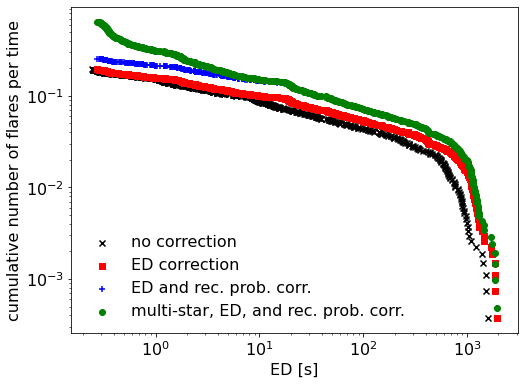

In [63]:
all_flares = pandas.read_pickle("../data/all_flares.pkl")
all_flares =all_flares.query("`ed_ratio`.notna()&`recovery_probability`.notna()&`ed_corr`.notna()")
# all_flares= all_flares.query("`flare_erg_rec`>1e31") # uncomment for the energy cut-off
# all_flares= all_flares.query("`name` != 'TRAPPIST-1'") # uncomment for excluding TRAPPIST-1 flares
E = all_flares["flare_erg_rec"].mean()
print(f"Mean energy: {E}")
t1=min(all_flares["tstart"])
t2=max(all_flares["tstop"])
multi_ffd = FFD(f=all_flares, ID="name", tot_obs_time=t2-t1)

fig, ax = plt.subplots(1, figsize=(8,6))


ed, freq, counts = multi_ffd.ed_and_freq()

ax.scatter(ed, freq, c="k", marker="x", label="no correction")

ed, freq, counts = multi_ffd.ed_and_freq(energy_correction=True)
ax.scatter(ed, freq, c="r", marker="s", label="ED correction")

ed, freq, counts = multi_ffd.ed_and_freq(energy_correction=True,
                                         recovery_probability_correction=True)

ax.scatter(ed, freq, c="b", marker="+", label="ED and rec. prob. corr.")

ed, freq, counts = multi_ffd.ed_and_freq(energy_correction=True,
                                         recovery_probability_correction=True,
                                         multiple_stars=True)

ax.scatter(ed, freq, c="g", label="multi-star, ED, and rec. prob. corr.")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("ED [s]")
ax.set_ylabel("cumulative number of flares per time")

g = -0.8
plt.legend(loc="lower left", frameon=False);

multi_ffd2 = FFD(f=all_flares, ID="name", tot_obs_time=t2-t1)

multi_ffd2.ed_and_freq(energy_correction=True,
                       recovery_probability_correction=True,
                       multiple_stars=True)

multi_ffd2.alpha, multi_ffd2.alpha_err = -g + 1, .1

multi_ffd2.fit_beta_to_powerlaw()
print(multi_ffd2.alpha, multi_ffd2.beta)
all_flares


#### The cell below fit power law and finds $\alpha$ and $\beta$ for all stars in the sample.  
The cell fits a power law to the Flare Frequency distribution. The 'mcmc' model is preferable and follows [Wheatland (2004)](https://ui.adsabs.harvard.edu/abs/2004ApJ...609.1134W/abstract) using Markov chain Monte Carlo method, and sampling from the joint posterior distribution in their equation [24] with a constant prior. The log-likelihood function can be found in `altaipony.wheatland.loglikelihood_uniform_wheatland`.
There is other available mode ("mmle") for quick estimates.
The cell also fits $\beta$  via linear least squares to a power law with given alpha using the cumulative FFD and estimate uncertainty using jackknife algorithm.

In [64]:
multi_ffd.fit_powerlaw("mcmc") # more quick but less accurate method is "mmle"
# multi_ffd.fit_powerlaw("mmle") 
print(f"alpha = {multi_ffd.alpha:.2f} +/- {multi_ffd.alpha_err:.2f}")
multi_ffd.fit_beta_to_powerlaw()

print(f"beta = {multi_ffd.beta:.2f} +/- {multi_ffd.beta_err:.4f}")

/usr/local/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
/usr/local/lib/python3.8/site-packages/altaipony/wheatland.py:327: RuntimeWarning: invalid value encountered in double_scalars
  lp = f1 + f2 + f3 + f4 + f5
100%|██████████| 500/500 [00:04<00:00, 107.02it/s]


alpha = 1.25 +/- 0.02
beta = 0.08 +/- 0.0013


Below we plot the same distribution with fitted power law, represented by the red curve, orange curve is for intrinsic $\alpha$.

Setting multiple_stars flag with True.
Setting ED with new values, size 522.
Setting frequency values with new values, size 522.
Setting frequency adjusted count values with new values, size 1713.
Setting multiple_stars flag with True.
Setting ED with new values, size 522.
Setting frequency values with new values, size 522.
Setting frequency adjusted count values with new values, size 1713.


0.2076532941211686


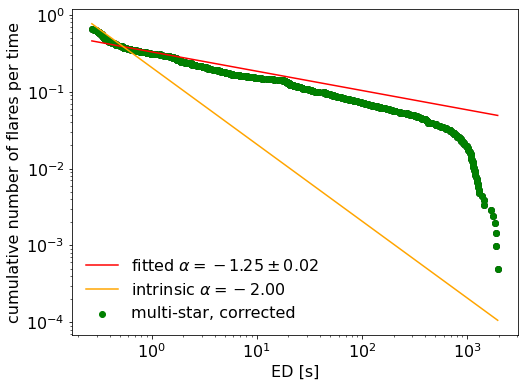

In [65]:
fig, ax = plt.subplots(1, figsize=(8,6))
g=-1.
# Plot the FFD together with the best fit power law


multi_ffd.plot_powerlaw(ax, c="r", label=fr"fitted $\alpha=-{multi_ffd.alpha:.2f} \pm {multi_ffd.alpha_err:.2f}$")

# Add the intrinsic distribution-------------------------------------------------

multi_ffd2 = FFD(f=all_flares, ID="name", tot_obs_time=t2-t1)

multi_ffd2.ed_and_freq(energy_correction=True,
                       recovery_probability_correction=True,
                       multiple_stars=True)

multi_ffd2.alpha, multi_ffd2.alpha_err = -g + 1, .1

multi_ffd2.fit_beta_to_powerlaw()
print(multi_ffd2.beta)
multi_ffd2.plot_powerlaw(ax, c="orange", label=fr"intrinsic $\alpha=-{multi_ffd2.alpha:.2f}$")
ed, freq, counts = multi_ffd.ed_and_freq(energy_correction=True,
                                         recovery_probability_correction=True,
                                         multiple_stars=True)

ax.scatter(ed, freq, c="g", label="multi-star, corrected")


plt.xscale("log")
plt.yscale("log")
plt.xlabel("ED [s]")
plt.ylabel("cumulative number of flares per time")

plt.legend(frameon=False)
